<ipython-input-27-d8416391fadf>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
<ipython-input-27-d8416391fadf>:24: RuntimeWarning: divide by zero encountered in log
  log_mapped = c * np.log(1 + saluran)


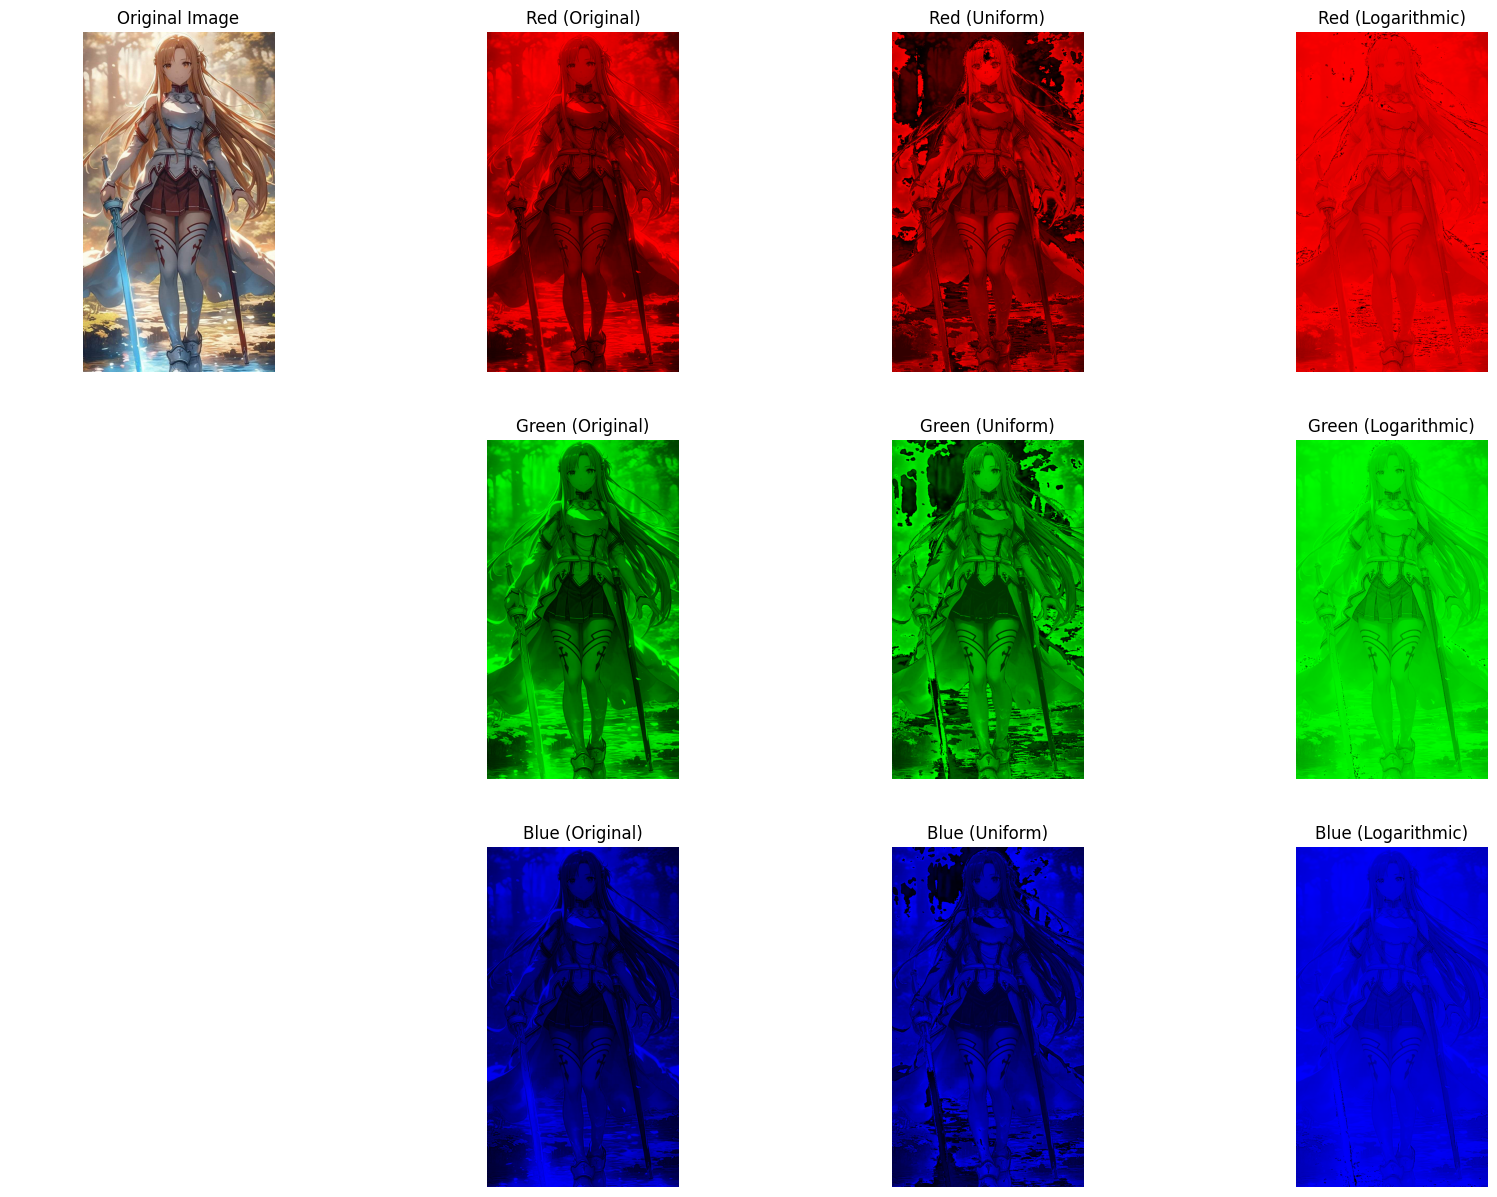

In [27]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Muat gambar
image_path = '/content/asuna.jpg'
image = imageio.imread(image_path)

# Konversi gambar dari RGB ke 3 saluran terpisah
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]

# --- Fungsi Pemetaan ---
def normalisasi_minmax(saluran):
    # Pastikan tipe data float untuk melakukan normalisasi yang benar
    saluran = saluran.astype(np.float32)
    min_val = np.min(saluran)
    max_val = np.max(saluran)
    # Normalisasi antara 50 hingga 350
    saluran_normal = 350 * (saluran - min_val) / (max_val - min_val)
    return np.clip(saluran_normal, 50, 350).astype(np.uint8)  # Pastikan hasilnya dikembalikan sebagai uint8

def pemetaan_logaritmik(saluran):
    c = 255 / np.log(1 + np.max(saluran))
    log_mapped = c * np.log(1 + saluran)
    return np.clip(log_mapped, 0, 255).astype(np.uint8)

# --- Akhir Fungsi Pemetaan ---

# Terapkan pemetaan ke setiap saluran
R_uniform = normalisasi_minmax(R)
G_uniform = normalisasi_minmax(G)
B_uniform = normalisasi_minmax(B)

R_log = pemetaan_logaritmik(R)
G_log = pemetaan_logaritmik(G)
B_log = pemetaan_logaritmik(B)

# --- Visualisasi ---
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 baris, 4 kolom untuk menyertakan gambar asli

# Gambar asli
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original Image')

# Saluran asli
axs[0, 1].imshow(np.stack([R, np.zeros_like(R), np.zeros_like(R)], axis=2))
axs[0, 1].set_title('Red (Original)')
axs[1, 1].imshow(np.stack([np.zeros_like(G), G, np.zeros_like(G)], axis=2))
axs[1, 1].set_title('Green (Original)')
axs[2, 1].imshow(np.stack([np.zeros_like(B), np.zeros_like(B), B], axis=2))
axs[2, 1].set_title('Blue (Original)')

# Pemetaan Uniform
axs[0, 2].imshow(np.stack([R_uniform, np.zeros_like(R_uniform), np.zeros_like(R_uniform)], axis=2))
axs[0, 2].set_title('Red (Uniform)')
axs[1, 2].imshow(np.stack([np.zeros_like(G_uniform), G_uniform, np.zeros_like(G_uniform)], axis=2))
axs[1, 2].set_title('Green (Uniform)')
axs[2, 2].imshow(np.stack([np.zeros_like(B_uniform), np.zeros_like(B_uniform), B_uniform], axis=2))
axs[2, 2].set_title('Blue (Uniform)')

# Pemetaan Logaritmik
axs[0, 3].imshow(np.stack([R_log, np.zeros_like(R_log), np.zeros_like(R_log)], axis=2))
axs[0, 3].set_title('Red (Logarithmic)')
axs[1, 3].imshow(np.stack([np.zeros_like(G_log), G_log, np.zeros_like(G_log)], axis=2))
axs[1, 3].set_title('Green (Logarithmic)')
axs[2, 3].imshow(np.stack([np.zeros_like(B_log), np.zeros_like(B_log), B_log], axis=2))
axs[2, 3].set_title('Blue (Logarithmic)')

# Matikan axis untuk semua subplot
for ax in axs.flat:
    ax.axis('off')

plt.show()
